In [1]:
#Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from pymks import (generate_multiphase, plot_microstructures, PrimitiveTransformer,
                   TwoPointCorrelation,FlattenTransformer, PrimitiveBasis)
from pymks.stats import correlate
from pymks.tools import draw_microstructures
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import glob
import pandas as pd
import csv

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [10]:
#Append images all to one list.
images = []
for filename in glob.glob(r'C:\Users\mikep\Desktop\project\data\micress\*.tif'):
    im=Image.open(filename)
    images.append(im)
np.shape(images[0])

(762, 1270)

In [12]:
#List comprehension to convert the members of the "images" list to arrays.
imarrays = [np.array(x) for x in images]
imarrays[0].shape

(762, 1270)

In [13]:
#Stacking all image arrays to create the 'sample' dimension and to convert the list to an array.
data_a = np.stack(images, axis=0)
data_a.shape

(1, 762, 1270)

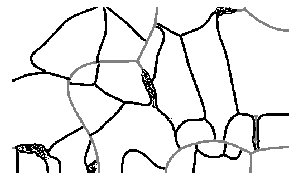

In [15]:
#Visualization of the microstructures.
plot_microstructures(*data_a[:10], cmap='gray', colorbar=False);

In [16]:
#List comprehension to add the "phases" axis with the PrimitiveTransformer class.
data = PrimitiveTransformer(n_state=2, min_=0.0, max_=1.0).transform(data_a)
data.shape

(1, 762, 1270, 2)

In [17]:
data_corr = TwoPointCorrelation(
    periodic_boundary=True,
    cutoff=10,
    correlations=[(0, 0), (0, 1)]
).transform(data)

data_corr.shape

#for i in range(0, 11):
    #print(data_corr[i, :, :, 0])

(1, 21, 21, 2)

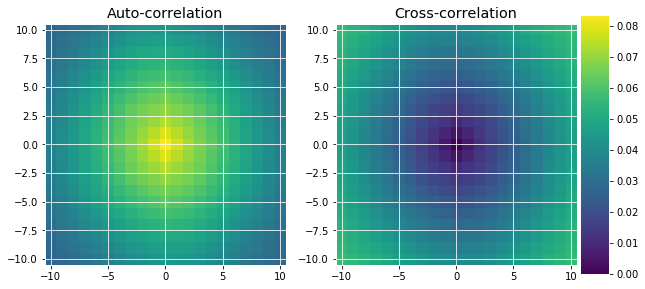

In [18]:
plot_microstructures(
    data_corr[0, :, :, 0],
    data_corr[0, :, :, 1],
    titles=['Auto-correlation', 'Cross-correlation'],
    showticks=True
);

In [36]:
pca = PCA(
    svd_solver='full',
    n_components=2,
    random_state=10
)

pc_scores=pca.fit_transform(data_corr.reshape(10, -1))
pc_scores.shape

(10, 2)

In [22]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
%matplotlib notebook

In [33]:
pca.components_



array([[ 0.04353453,  0.00897874,  0.0440911 , ...,  0.00842216,
         0.04353453,  0.00897874],
       [-0.02119029,  0.05810305, -0.01860068, ...,  0.05551344,
        -0.02119029,  0.05810305]])

In [34]:
for x in range(len(pc_scores)):
    print(pc_scores[x])

[ 2.52136328e+00 -2.69897619e-05]
[-0.29000827 -0.00312339]
[-0.27493848  0.00874627]
[-0.28002699 -0.00126992]
[-0.27883858 -0.00053754]
[-0.27906791 -0.00110094]
[-0.27951997 -0.00159776]
[-0.27979491 -0.00152235]
[-0.28021164 -0.00185085]
[-0.27895654  0.00228348]


In [31]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
pc1, pc2 = np.split(pc_scores, 2)
print(pc1, pc2)

[[ 2.52136328e+00 -2.69897619e-05]
 [-2.90008267e-01 -3.12339076e-03]
 [-2.74938483e-01  8.74626715e-03]
 [-2.80026990e-01 -1.26992393e-03]
 [-2.78838580e-01 -5.37541170e-04]] [[-0.27906791 -0.00110094]
 [-0.27951997 -0.00159776]
 [-0.27979491 -0.00152235]
 [-0.28021164 -0.00185085]
 [-0.27895654  0.00228348]]


<IPython.core.display.Javascript object>


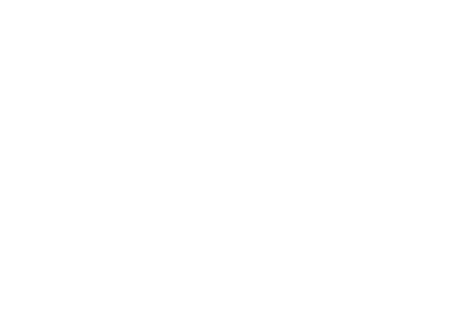

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


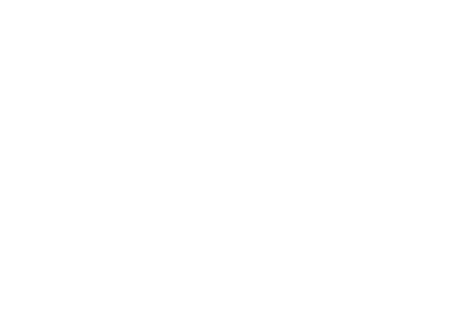

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
#, projection='2d')

ax.scatter(pc1[:,0], pc1[:,1], c='red', marker='o')
ax.scatter(pc2[:,0], pc2[:,1], c='blue', marker='o')
#ax.scatter(pc3[:,0], pc3[:,1], pc3[:,2], c='b', marker='o')

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
#ax.set_zlabel("PC3")

plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.legend()

plt.show()

In [14]:
# write csv file
f = open(r'C:\Users\mikep\Desktop\project\data\pc-scores\pc1.csv', 'w')
writer = csv.writer(f)
writer.writerow(pc1)
f.close()